##  PART-1
### Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms. 

#### Algorithm used K-NN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,classification_report,confusion_matrix,recall_score,precision_score,roc_auc_score,accuracy_score
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore,ttest_ind,skew, f_oneway,chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing and Warehousing the data

In [2]:
df1=pd.read_csv("Part1 - Normal.csv")
df2=pd.read_csv("Part1 - Type_H.csv")
df3=pd.read_csv("Part1 - Type_S.csv")


In [3]:
df1.shape,df2.shape,df3.shape

((100, 7), (60, 7), (150, 7))

In [4]:
df1.columns,df2.columns,df3.columns

(Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
        'Class'],
       dtype='object'),
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
        'Class'],
       dtype='object'),
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
        'Class'],
       dtype='object'))

## Merge and Explore the final data

In [5]:

data=pd.concat([df1,df2,df3])
data.shape

(310, 7)

In [6]:
data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [7]:
data.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
69,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862,Normal
11,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Nrmal
89,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,Type_S
140,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,Type_S
49,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,Type_S
23,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619,Nrmal
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,type_h
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
83,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,Type_S
56,46.374088,10.215902,42.700000,36.158185,121.247657,-0.542022,Normal


## Data cleansing: 
 -  Explore and if required correct the datatypes of each attribute 
 - Explore for null values in the attributes and if required drop or impute values. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [9]:
#changing Target Variable as category
data["Class"]=data["Class"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.5 KB


In [10]:
data.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

- There are no missing values in the dataset but few misspelled entries in target column which needs to be replaced


In [11]:
data["Class"].unique()

[Normal, Nrmal, Type_H, type_h, Type_S, tp_s]
Categories (6, object): [Normal, Nrmal, Type_H, type_h, Type_S, tp_s]

In [12]:
data.replace({"Class":{"Nrmal":"Normal","type_h":"Type_H","tp_s":"Type_S"}},inplace=True)

In [13]:
data["Class"].value_counts(normalize=True)

Type_S    0.483871
Normal    0.322581
Type_H    0.193548
Name: Class, dtype: float64

- Here we have imbalanced data. Type_S has almost 50% of contribution in dataset
- thus our model can be biased towards Type_s because of its higher density in the space

## Data Analysis and visualization
 - Perform detailed statistical analysis on the data.
 - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each   
   analysis

In [14]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


- as we can see that the different variables present different value ranges, therefore have different magnitute.
- not only the minimum and maximum values are different, but they also spread over ranges of different widths also.
- Thus this data set is a potential candidate for normalization

## Univariate Analysis

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

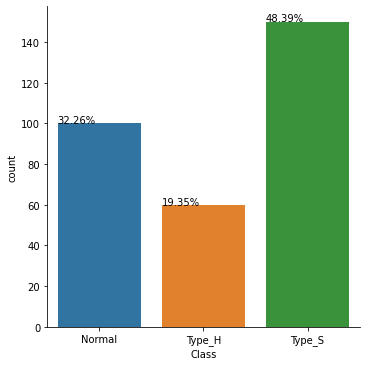

In [15]:
#target Column
g=sns.catplot(x=data["Class"],data=data,kind="count")
for p in g.ax.patches:
    txt=str(((p.get_height()/len(data["Class"]))*100).round(2)) + '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.tight_layout 

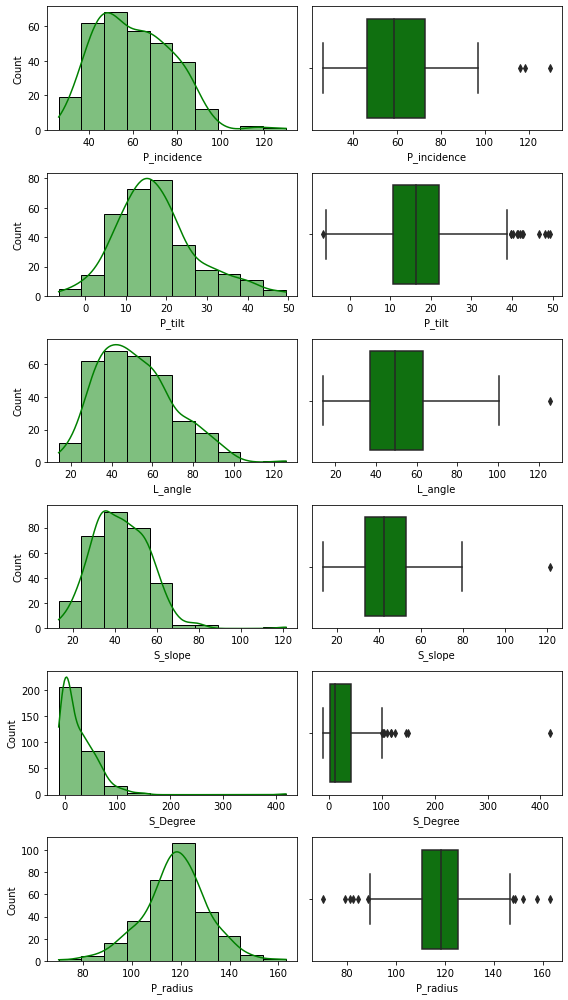

In [16]:
fig,ax= plt.subplots(6,2,figsize=(8,14))
sns.histplot(x=data["P_incidence"],data=data,bins=10,ax=ax[0][0],kde=True,color="green");
sns.boxplot(x=data["P_incidence"],data=data,ax=ax[0][1],color="green")

sns.histplot(x=data["P_tilt"],data=data,bins=10,ax=ax[1][0],kde=True,color="green")
sns.boxplot(x=data["P_tilt"],data=data,ax=ax[1][1],color="green")

sns.histplot(x=data["L_angle"],data=data,bins=10,ax=ax[2][0],kde=True,color="green")
sns.boxplot(x=data["L_angle"],data=data,ax=ax[2][1],color="green")

sns.histplot(x=data["S_slope"],data=data,bins=10,ax=ax[3][0],kde=True,color="green")
sns.boxplot(x=data["S_slope"],data=data,ax=ax[3][1],color="green")

sns.histplot(x=data["S_Degree"],data=data,bins=10,ax=ax[4][0],kde=True,color="green")
sns.boxplot(x=data["S_Degree"],data=data,ax=ax[4][1],color="green")

sns.histplot(x=data["P_radius"],data=data,bins=10,ax=ax[5][0],kde=True,color="green")
sns.boxplot(x=data["P_radius"],data=data,ax=ax[5][1],color="green")

plt.tight_layout()

- P_incidence is fairly normally distributed but has few outliers.Its 2nd and 3rd quartiles are between 46 and 73
- 75% of P_incidence values are below 72
- P_tilt is skewed positively and has outliers on both the sides.Its 2nd and 3rd quartiles are between 11 and  
  22.Thus 75% of its values are below 22
- L_angle is slightly skewed positively and has very few outliers.Its 2nd and 3rd quartiles are between 38 and 62.Thus   75% of its values are below 62
- S_slope has strongl +ve skew and has very few outliers.Its 2nd and 3rd quartiles are between 33 and 53.Thus 75% of     its values are below 53
- P_radius is normally distributed and has many outliers on both the sides outliers.Its 2nd and 3rd quartiles are   
  between 110 and 125.Thus 75% of its values are below 125
- S_Degree is highly skewed on +ve side has outliers too.Its 2nd and 3rd quartiles are between 1 and 45.Thus 75% of its   values are below 45
  


## Bivariate Analysis
### analysing average number of Class(Normal,Type_h,Type_s) type for each feature in dataset

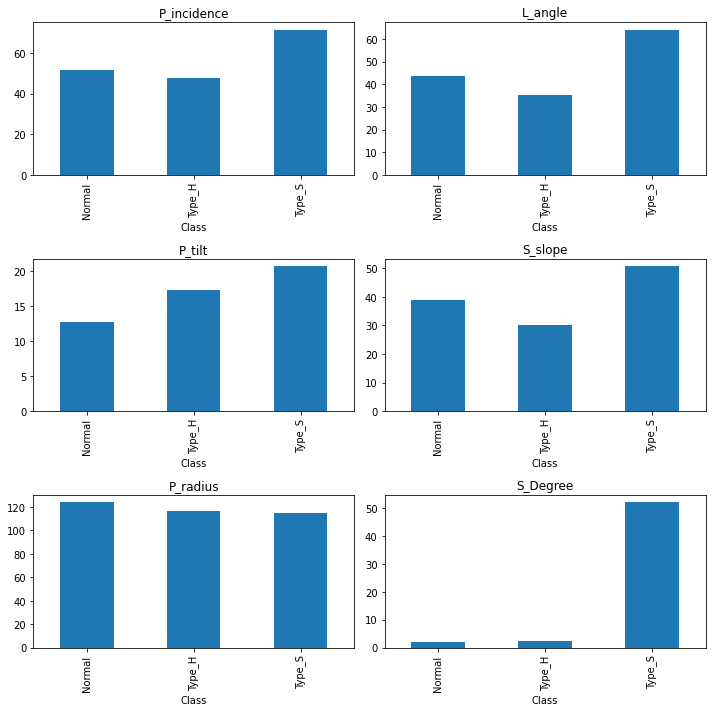

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.title("P_incidence")
data.groupby("Class")["P_incidence"].mean().plot.bar()

plt.subplot(3,2,2)
plt.title("L_angle")
data.groupby("Class")["L_angle"].mean().plot.bar()

plt.subplot(3,2,3)
plt.title("P_tilt")
data.groupby("Class")["P_tilt"].mean().plot.bar()

plt.subplot(3,2,4)
plt.title("S_slope")
data.groupby("Class")["S_slope"].mean().plot.bar()

plt.subplot(3,2,5)
plt.title("P_radius")
data.groupby("Class")["P_radius"].mean().plot.bar()

plt.subplot(3,2,6)
plt.title("S_Degree")
data.groupby("Class")["S_Degree"].mean().plot.bar()

plt.tight_layout()

-  Average number of cases in P_radius are almost same 
-  All other features have different in means for each Class of target variable thus we can say Except P_radius all          the   features seems to have an association with target variable 
-  Each feature in the dataset contribute more towards Type_S class 
-  L_angle has maximum contribution towards Type_S Class and after that S_Degree contribute more towards Type_S class

### Analysising each feature variable further by binning the Continous feature variables based on their quantile values

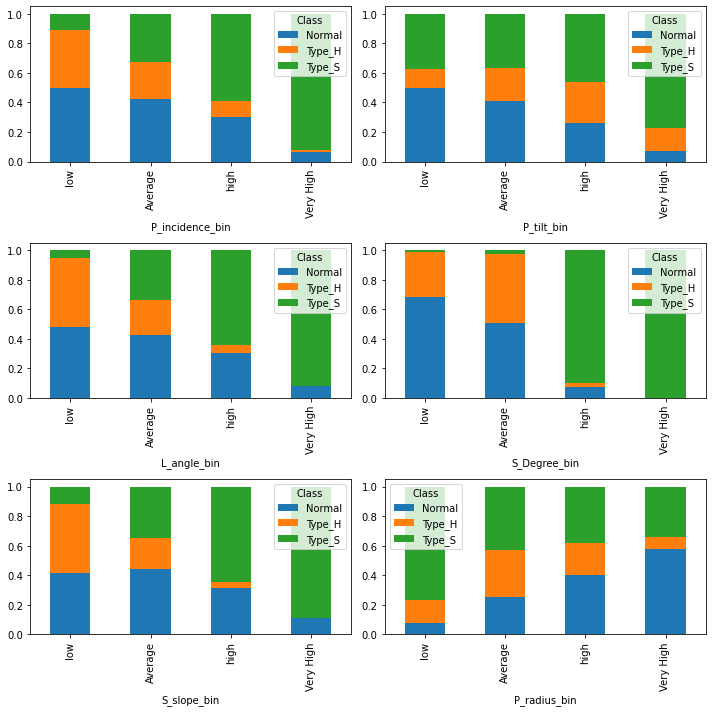

In [18]:
fig,ax=plt.subplots(3,2,figsize=(10,10))

ax1=plt.subplot(3,2,1)

plt.xlabel([])
bin1=[27,47,59,73,130]
values1=["low","Average","high","Very High"]
data["P_incidence_bin"]=pd.cut(data["P_incidence"],bin1,labels=values1)
P_Incidence=pd.crosstab(data["P_incidence_bin"],data["Class"])
P_Incidence.div(P_Incidence.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax1)

ax2 =plt.subplot(3,2,2)

bin2=[-6,11,17,23,50]
values2=["low","Average","high","Very High"]
data["P_tilt_bin"]=pd.cut(data["P_tilt"],bin2,labels=values2)
tilt_bin=pd.crosstab(data["P_tilt_bin"],data["Class"])
tilt_bin.div(tilt_bin.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax2)

ax3=plt.subplot(3,2,3)

plt.xlabel("")
bin3=[14,37,50,63,126]
values3=["low","Average","high","Very High"]
data["L_angle_bin"]=pd.cut(data["L_angle"],bin3,labels=values3)
L_angle_bin=pd.crosstab(data["L_angle_bin"],data["Class"])
L_angle_bin.div(L_angle_bin.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax3)

ax4=plt.subplot(3,2,4)

bin4=[-11,2,12,42,419]
values4=["low","Average","high","Very High"]
data["S_Degree_bin"]=pd.cut(data["S_Degree"],bin4,labels=values4)
S_Degree_bin=pd.crosstab(data["S_Degree_bin"],data["Class"])
S_Degree_bin.div(S_Degree_bin.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax4)

ax5=plt.subplot(3,2,5)

bin5=[14,34,43,53,122]
values5=["low","Average","high","Very High"]
data["S_slope_bin"]=pd.cut(data["S_slope"],bin5,labels=values5)
S_slope_bin=pd.crosstab(data["S_slope_bin"],data["Class"])
S_slope_bin.div(S_slope_bin.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax5)

ax6=plt.subplot(3,2,6)

bin6=[70,111,118,126,164]
values6=["low","Average","high","Very High"]
data["P_radius_bin"]=pd.cut(data["P_radius"],bin6,labels=values6)
P_radius_bin=pd.crosstab(data["P_radius_bin"],data["Class"])
P_radius_bin.div(P_radius_bin.sum(1).astype("float64"),axis=0).plot.bar(stacked=True,ax=ax6)

plt.tight_layout()


## Few insight from above plots
- for every features in dataset the number of patients in NORMAL Class are less often reported then  TYPE_H and TYPE_S
- Most of the patients in TYPE_S category have higher number of S_Degree values
- Though average values of P_radius for each class of target variable is almost same but if we look at the individual     categories of target variables then we will see that Type_S patients have lower values of P_radius
- In the whole dataset number of TYPE_S cases are maximum
- All the feature have high values for TYPE_S cases except P_radius
- All the features seems to be good predictor of Class Variable

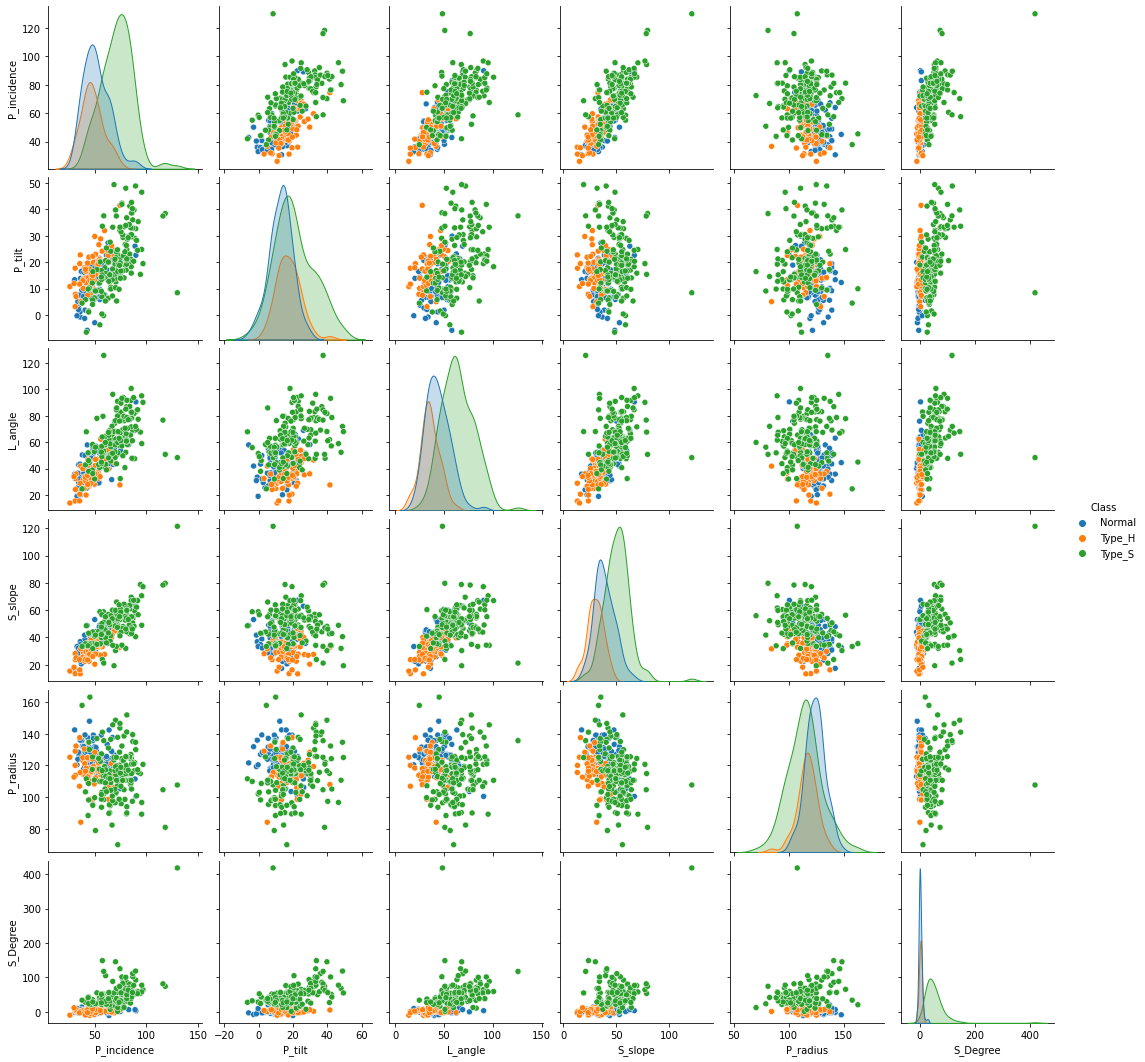

In [19]:
sns.pairplot(data=data,hue="Class");

- P_radius has absolutely no relationship with any feature 
- L_angle has weak linear relationship with p_tilt and S_Degree
- P_tilt and S_slope has no relationship at all
- P_incidence has a strong relationship every other feature except P_radius
- S_Degree data is dominated by Type_S counts,thus giving it positive skew
- S_Degree has a linear relationship S_Slope,L_angle and P_incidence and p_tilt
- S_slope has significant relationship with L_angle and P_incidence 

## Correlation Analysis

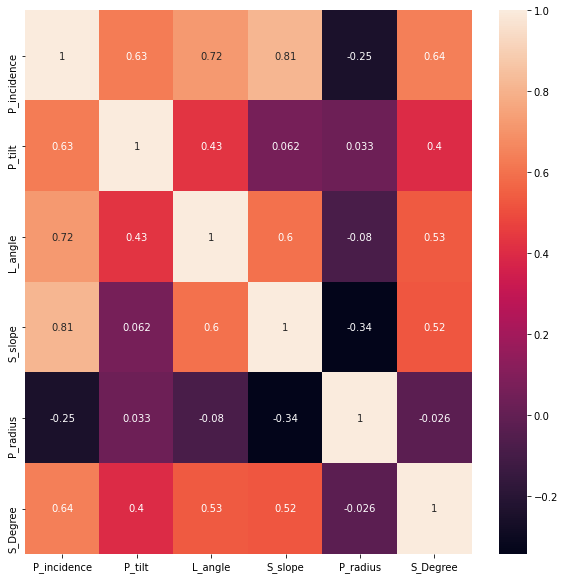

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Analysing the correlation between Continous Independent Variables and Categorical Dependent Variable 
####  Here  i have used separate bins that are created in bivariate analysis phase to convert continous variables to categorical  variables are used to check for the independence 




## Hypothesis testing(Chi Square Test)
- Null Hypothesis:  There is no relationship between Feature and target variable 
- Alternate Hypothesis: There is a significant relationship between Feature and target variable 

In [21]:
#creating contengency table
crosstab=[]
for col in ["P_incidence_bin","P_tilt_bin","L_angle_bin","S_Degree_bin","S_slope_bin","P_radius_bin"]:
    col=pd.crosstab(data[col],data["Class"])
    crosstab.append(col)

for tab, col in [(crosstab[0],"P_incidence"),(crosstab[1],"P_tilt"),(crosstab[2],"L_angle"),(crosstab[3],"S_Degree"),(crosstab[4],"S_slope"),(crosstab[5],"P_radius")]:
    stats,pval,_,_=chi2_contingency(tab)
    if pval<0.05:
        print("{}There is a significant relationship between {} Variable and Class Variable ".format('\033[1m',col))
    else:
        print("{}There is no relationship between {} and Class Variable".format('\033[1m',col))  
    
                                                                                                                                                                                                        

There is a significant relationship between P_incidence Variable and Class Variable 
There is a significant relationship between P_tilt Variable and Class Variable 
There is a significant relationship between L_angle Variable and Class Variable 
There is a significant relationship between S_Degree Variable and Class Variable 
There is a significant relationship between S_slope Variable and Class Variable 
There is a significant relationship between P_radius Variable and Class Variable 


### Further doing ANOVA test to assert result from chi square test  of independence
- ANOVA will tell us if there is any significant difference in means of subgroups of particular Feature for different     categories of target variable
  
  - Null Hypothesis: There is no significant difference in feature Variable for three different categories of Class variable
  - Alternate Hypothesis:There is significant difference in feature for three different categories of Class variable

In [22]:

for col in ["P_incidence","P_tilt","L_angle","S_Degree","S_slope","P_radius"]:
    normal=data[data["Class"]=="Normal"][col]
    type_H=data[data["Class"]=="Type_H"][col]
    type_S=data[data["Class"]=="Type_S"][col]
    f_stat,pval= f_oneway(normal,type_H,type_S)
    if pval<0.05:
        print("There is significant difference in {} for three different categories of Class variable".format(col))
    else:
        print("There is no significant difference in {} for three different categories of Class variable".format(col))
    

There is significant difference in P_incidence for three different categories of Class variable
There is significant difference in P_tilt for three different categories of Class variable
There is significant difference in L_angle for three different categories of Class variable
There is significant difference in S_Degree for three different categories of Class variable
There is significant difference in S_slope for three different categories of Class variable
There is significant difference in P_radius for three different categories of Class variable


### Data pre-processing: 
 - Segregate predictors vs target attributes 
 - Perform normalisation or scaling if required.
 - Check for target balancing. Add your comments. 
 - Perform train-test split. 
 
 ### Encoding Target Variable

In [23]:
data["Class"]=data["Class"].replace({"Normal":0,"Type_H":1,"Type_S":2})

In [24]:
data["Class"].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

- convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
- It is always adviced to scale numeric attributes in models that calculate distances.

Dropping extra columns made while binning the numerical data

In [25]:
data.drop(['P_incidence_bin','P_tilt_bin', 'L_angle_bin', 'S_Degree_bin',
       'S_slope_bin', 'P_radius_bin'],axis=1,inplace=True)

In [26]:
#Normalizing the data as different Feature variables present different value ranges, therefore have different magnitute.
minmaxscaler= MinMaxScaler()
#Segregate predictors vs target attributes
X=data.drop(["Class"],axis=1)
y=data["Class"]
col=X.columns

In [27]:
X_norm= minmaxscaler.fit_transform(X)
X_norm=pd.DataFrame(X_norm,columns=col)

In [28]:
X_norm.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- As we can see after normalization all the features have min and max values as 0 and 1 respectively and their spread is also scaled between 0 and 1



## Building and Training the Model

In [29]:
#checking for data imbalance
y.value_counts(normalize=True)

2    0.483871
0    0.322581
1    0.193548
Name: Class, dtype: float64

- Here it is evident that Class 2 has maximum contribution in the data set thus making it an imbalanced data

For K-NN if the training set is imbalanced, and if the uniform distribution assumption were to still hold, the probability that the k nearest neighbors of new query point will belong to the class with more examples becomes higher. So, the closest neighbor of the new query point may still belong to the class with less examples, but if rest of  points belong to the other class (because of its higher density in the space), the point will get misclassified. 

- For the above reason the data set needs to be Balanced



### Baseline K-NN model with 3,5,7,9 neighbours using Imbalanced Data

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X_norm,y,test_size=0.2,random_state=1)

In [31]:
for k in [3,5,7,9]:
    for metric in ["euclidean","manhattan"]:
        model=KNeighborsClassifier(n_neighbors=k,metric=metric)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(" Training Accuracy Score for k= {} using {} metric is ({})".format(k,metric,model.score(X_train,y_train).round(3)))
        print(" Test Accuracy Score for k= {} using {} metric is ({})".format(k,metric,model.score(X_test,y_test).round(3)))
        print("")
        print('=======Classification report(k = {}) ======= '.format(k))
        print(classification_report(y_test,y_pred))

 Training Accuracy Score for k= 3 using euclidean metric is (0.875)
 Test Accuracy Score for k= 3 using euclidean metric is (0.661)

=======Classification report(k = 3) ======= 
              precision    recall  f1-score   support

           0       0.48      0.56      0.51        18
           1       0.64      0.64      0.64        11
           2       0.80      0.73      0.76        33

    accuracy                           0.66        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.68      0.66      0.67        62

 Training Accuracy Score for k= 3 using manhattan metric is (0.875)
 Test Accuracy Score for k= 3 using manhattan metric is (0.677)

=======Classification report(k = 3) ======= 
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.62      0.45      0.53        11
           2       0.86      0.73      0.79        33

    accuracy                           0.68  

- for Target variable as category 0 the important metric to consider is precision because we dont want to 
  categorise a patient as normal when he might be in a category Type_H and Type_S ie we we are intrested in    
  model’s ability to tell what proportion of the data points our model says is  relevant actually are relevant.
- for Target variable as category 1 and 2 the important metric to consider is recall because we are intrested in    
  model’s ability to find all the data points of interest in a dataset.We dont want to miss any observations that fall   in either of the category Type_H and Type_S
- thus to handle this tradeoff between recall and precision we will go by f1_score to get optimal blend of both     precision and recall  

- Generalised Traing and Test accuracies are available with k=7 as 82% and 73% respectively

when euclidean distance is used

     max recall class 0 = 67% for k=5 with f1 score of 60%
     max recall class 1 = 82% for k=7 with f1 score of 72%
     max recall class 2 = 76% for k=7 with f1 score of 81%
     
     max precision class 0 = 58% for k=7 with f1 score of 59%
     max precision class 1 = 73% for k=5 with f1 score of 64%
     max precision class 2 = 83% for k=7 with f1 score of 81%
     
when manhattan distance is used

     max recall class 0 = 72% for k=5 with f1 score of 63%
     max recall class 1 = 82% for k=9 with f1 score of 72%
     max recall class 2 = 76% for k=9 with f1 score of 81%
     
     max precision class 0 = 63% for k=9 with f1 score of 65%
     max precision class 1 = 73% for k=5 with f1 score of 73%
     max precision class 2 = 86% for k=5 with f1 score of 79%
     
we can see that when manhattan distance is used the overall recall ,precision and f1 score has increased but for different values of k. Thus we need to calculate optimal value of k and we should not forget that our data is imbalanced too. Above Score shows that our model is biased towards class 2 thus balancing the data will improve the overall performance of the model


  

## Automating the task of finding best values of K for KNN using kFold CrossValidation
### for Balancing the data stratifiedKFold crossvalidation is used anlong with SMOTE

In [33]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# range of k we want to try
k_range = range(3, 31)
# empty list to store scores
kscore=[]
trainscore=[]
testscore=[]
cross_val_f1_score_lst = []
# 1. we will loop through reasonable values of k
for k in k_range:
# 2. run KNeighborsClassifier with k neighbours
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    # enumerate the splits and summarize the distributions
    for train_ix, test_ix in kfold.split(X_norm, y):
        # select rows
        X_train, X_test_res = X_norm.iloc[train_ix], X_norm.iloc[test_ix]
        y_train, y_test_res = y.iloc[train_ix], y.iloc[test_ix]
        sm = SMOTE(random_state=42)
        X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
        knn_cv.fit(X_train_res,y_train_res)
        # testing on 1 fold of validation set
        y_pred_res = knn_cv.predict(X_test_res)
        train_score=knn_cv.score(X_train_res,y_train_res)
        test_score=knn_cv.score(X_test_res,y_test_res)
        scores = accuracy_score(y_test_res, y_pred_res)
        cross_val_f1_score = f1_score(y_test_res, y_pred_res,average='macro')
    trainscore.append(train_score.mean())
    testscore.append(test_score.mean())
    kscore.append(scores.mean())
    cross_val_f1_score_lst.append(cross_val_f1_score.mean())   
print("Maximum Training Accuracy",max(trainscore))
print("Maximum Testing Accuracy",max(testscore))  
print("Maximum f1_score",max(cross_val_f1_score_lst))
print("Maximum Accuracy_score",max(kscore))

Maximum Training Accuracy 0.9432098765432099
Maximum Testing Accuracy 0.8709677419354839
Maximum f1_score 0.861904761904762
Maximum Accuracy_score 0.8709677419354839


In [34]:
#for our problem statement we want a fair balance between recall and precision thus we will choose optimal value of k 
# which gives maximum f1_score
optimal_k = k_range[cross_val_f1_score_lst.index(max(cross_val_f1_score_lst))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 21


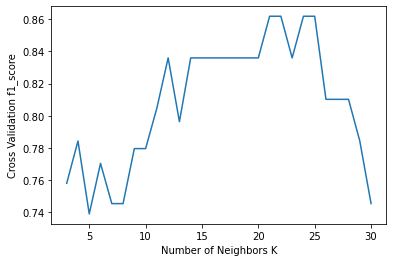

In [35]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_range, cross_val_f1_score_lst)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross Validation f1_score')
plt.show()

## Evaluating the model performance with balanced dataset created using SMOTE

in Baseline model with imbalanced data we have seen the values of recall and precision for different values of k. The metric to analyse the performance of the model is f1_score as explained above 
- we want model to predict relevant data points accurately with less misclassifications.Thus maximum precision is necessary
- at the same time we dont want to miss any observations that fall in either of the category Type_H and Type_S.Thus maximum recall is also needed
- thus f1_score will be used to get the optimal blend of precision and recall
- Here Cross-Validated f1_score is 86.1.2%.This score is more generalised and reliable then the Basic Model
- optimal number of n_neighbors: 21
- accuracy is maximum at k=21
- low values of k(low bias high variance)
    - The 1-Nearest Neighbor classifier is the most complex nearest neighbor model
    - It has the most jagged decision boundary, and is most likely to overfit
- high values of k(high bias low variance)
    - it gives underfit model
 


- Balancing the data has significantly increased our model's f1_score from 81% to 86.2%
- optimal number of n_neighbors: 21
- accuracy is maximum at k=21

### tuning Hyperparameters using  GridSearchCV

In [36]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,31))
weights= ['uniform', 'distance']
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=[1,2],weights=weights)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
#kfold used is stratified thus we can use our imbalanced data to fit the model
model= GridSearchCV(knn_2, hyperparameters, cv=kfold)
#Fit the model
best_model = model.fit(X_norm,y)

In [37]:
print("Best Score:",best_model.best_score_.round(3))
print("Best Parameters for the K-NN model",best_model.best_params_)

Best Score: 0.823
Best Parameters for the K-NN model {'leaf_size': 1, 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}


## Conclusion:
- All the features are good predictor of Class Variable
- model predicts relevant data points accurately with less misclassifications.Thus has good precision 
- Model has a good recall score as well which minimizes any miss classifications of either of the category Type_H and   Type_S.
- kfold cross Validation is giving the optimal value of k=21 with f1_score of 86% 
- Model's hyperparameters are tunned using GridSearchCV giving the best score of 82.3%
- other best hyperparameters are
  distance=Manhattan
  k=17
  leaf_size=1
  algorithm=auto
- Dataset for building the model was imbalanced thus was balanced 
- after tuning hyperparameters score has reduced from 86 to 82.3 but this is more generalised and reliable than the one we got after Kfold CV
- data no missing values but data is imbalanced 
- though appropriate oversampling is done to balance the data but oversampling has a drawback of creating overlapping data
- this overlapping may give some problem in classifier performance as samples from different classes may share similar characteristics since the boundaries of each class may not be clearly defined.
- SMOTE is carefully used on training Data only to prevent and data leaking


# PART- 2

###  PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset

### Import and warehouse data:
    - Import all the given datasets and explore shape and size of each.
    - Merge all datasets onto one and explore final shape and size.


In [3]:
DF1= pd.read_csv("Part2 - Data1.csv")
DF2=pd.read_csv("Part2 -Data2.csv")

In [4]:
DF1.shape

(5000, 8)

In [5]:
DF2.shape

(5000, 7)

In [6]:
Data= pd.concat([DF1,DF2],axis=1)
#removing duplicate columns
Data=Data.loc[:,~Data.columns.duplicated()]
Data.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [7]:
Data.shape

(5000, 14)

In [8]:
Data.sample(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4590,4591,58,34,151,94022,3,0.6,2,0,0,0,0,0,1.0
1765,1766,26,0,149,95051,2,7.2,1,154,0,0,0,0,0.0
1083,1084,28,3,65,95014,3,2.6,3,0,1,0,0,0,0.0
1828,1829,30,4,25,92123,2,0.3,2,0,0,0,0,0,0.0
1990,1991,32,8,29,92807,1,0.2,3,76,0,0,1,1,0.0
1648,1649,47,21,85,93106,2,1.7,2,0,0,0,0,1,0.0
2484,2485,46,21,30,92697,1,1.4,3,112,1,0,0,0,0.0
1077,1078,29,3,175,90095,3,3.3,3,329,0,0,1,0,1.0
1002,1003,46,20,85,95617,2,0.4,3,0,0,0,0,0,0.0
2233,2234,59,35,39,92028,1,1.8,3,0,0,0,1,0,0.0


In [9]:
#removing ID column
Data.drop("ID",axis=1,inplace=True)
Data.shape

(5000, 13)

### Data cleansing: 
  -  Explore and if required correct the datatypes of each attribute 
  -  Explore for null values in the attributes and if required drop or impute values. 

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [11]:
#checking for th enumber of unique values in every column of the dataframe
Data.nunique().sort_values()

Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
LoanOnCard               2
Level                    3
HiddenScore              4
Age                     45
CustomerSince           47
MonthlyAverageSpend    108
HighestSpend           162
Mortgage               347
ZipCode                467
dtype: int64

In [16]:
#based on above values we have 7 columns which have categorical data but their datatype is numerical
#changing categorical columns of type numeric to type category 
cat_col=["HiddenScore","Level","Security","FixedDepositAccount","InternetBanking","CreditCard"]
for col in cat_col:
    Data[col]=Data[col].astype("category")
    

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   category
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   category
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   category
 9   FixedDepositAccount  5000 non-null   category
 10  InternetBanking      5000 non-null   category
 11  CreditCard           5000 non-null   category
 12  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(5)
memory usage: 303.5 KB


- Checking for the missing values

In [18]:
Data.isna().sum().sort_values()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [19]:
#checking what percentage of data is missing
Data["LoanOnCard"].isna().value_counts(normalize=True)

False    0.996
True     0.004
Name: LoanOnCard, dtype: float64

- though only 4% of data is missing but still imputing the missing values 

In [20]:
#imputing missing values in LoanOnCard
Data["LoanOnCard"].fillna(Data["LoanOnCard"].mode()[0],inplace=True)

In [21]:
Data.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [22]:
# converting Target column from float to category
Data["LoanOnCard"]=Data["LoanOnCard"].astype('int').astype("category")
Data["LoanOnCard"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [23]:
Data["LoanOnCard"].value_counts(normalize=True)

0    0.904
1    0.096
Name: LoanOnCard, dtype: float64

- This is an imbalanced dataset. Thus this dataset might be biased towards predicting maximum times "0" 

## Data analysis & visualisation: 
  -  Perform detailed statistical analysis on the data. 
  -  Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each        analysis. 
### Univariate analysis and Bivariate Analysis


In [24]:
#Analysing Features 
Data.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


- as we can see that the different variables present different value ranges(min and max values),therefore have different magnitute.
- not only the minimum and maximum values are different, but they also spread over ranges of different widths also.
- Thus this data in this dataset need to be scaled as logistic regression will converge more quickely towards minima if the features are on same scale
- looking at mean and median values it is quite evident that we have few features with positive skew like:
  - HighestSpend
  - ZipCode
  - MonthlyAverageSpend
  - Mortgage
  - Security 
  - FixedDepositAccount

In [25]:
#analysing Target Variable
Data["LoanOnCard"].describe()

count     5000
unique       2
top          0
freq      4520
Name: LoanOnCard, dtype: int64

- we have total 5000 values with binary data. Most common values are of label 0. Total number of frequency of label 0 is 4520 

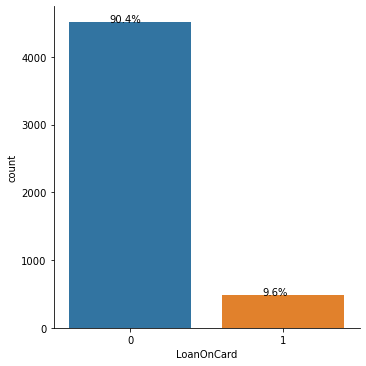

In [26]:
g=sns.catplot(x="LoanOnCard",data=Data,kind="count")
for p in g.ax.patches:
    txt=str(((p.get_height()/Data["LoanOnCard"].value_counts().sum())*100).round(2))+ "%"
    txtx=p.get_x()
    txtwidth=p.get_width()/3
    txty=p.get_height()
    g.ax.text(txtx+txtwidth,txty,txt)

### Univariate and Bivariate  analysis of  Feature variables

In [58]:
#segregating Categorical and numerical columns
cat_col=(Data.columns[Data.dtypes=="category"]).to_list()
num_col=(Data.columns[~(Data.dtypes=="category")]).to_list()

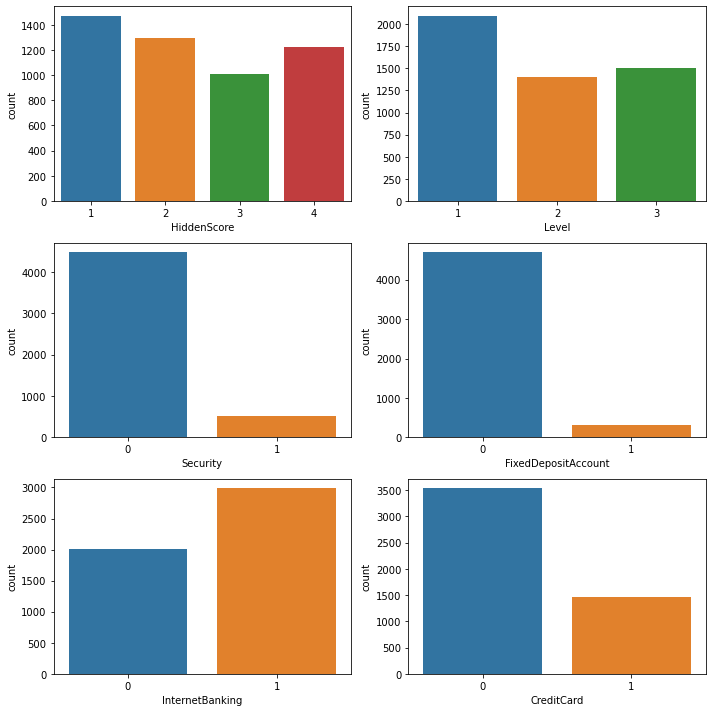

In [59]:
fig,ax= plt.subplots(3,2,figsize=(10,10))

sns.countplot(x="HiddenScore",data=Data,ax=ax[0][0])    
sns.countplot(x="Level",data=Data,ax=ax[0][1])   
sns.countplot(x="Security",data=Data,ax=ax[1][0])    
sns.countplot(x="FixedDepositAccount",data=Data,ax=ax[1][1])    
sns.countplot(x="InternetBanking",data=Data,ax=ax[2][0])        
sns.countplot(x="CreditCard",data=Data,ax=ax[2][1])

    
plt.tight_layout() 

- Overall we have non uniform categorical columns
### analysing further every categorical column on the basis of Target Variable

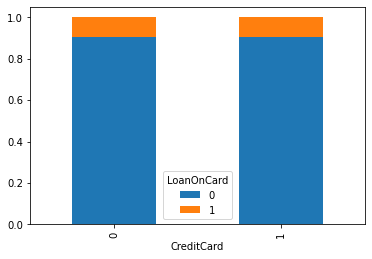

In [60]:
Creditcard=pd.crosstab(Data["CreditCard"],Data["LoanOnCard"])
Creditcard.div(Creditcard.sum(1).astype(float),axis=0).plot.bar(stacked=True)


- people who have credit card and those who dont have credit card have equal probability of having Loan on card.Thus this feature has no effect on loan on card

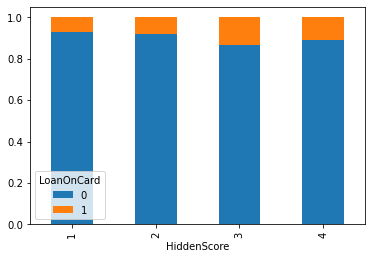

In [61]:
Hiddenscore=pd.crosstab(Data["HiddenScore"],Data["LoanOnCard"])
Hiddenscore.div(Hiddenscore.sum(1).astype(float),axis=0).plot.bar(stacked=True)

- Customer with  hidden score as 3 and 4 have given more loans on card as compared to customers with hidden score 1 and 2

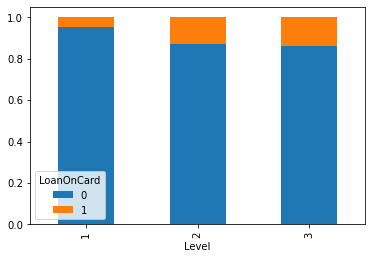

In [62]:
Level=pd.crosstab(Data["Level"],Data["LoanOnCard"])
Level.div(Level.sum(1).astype(float),axis=0).plot.bar(stacked=True)

- Customers at  level 2 and 3 have given more loans on card as compared to customers at level 1

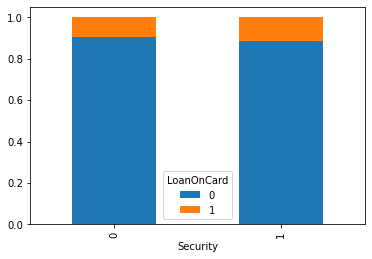

In [63]:
Security=pd.crosstab(Data["Security"],Data["LoanOnCard"])
Security.div(Security.sum(1).astype(float),axis=0).plot.bar(stacked=True)

- Having some Security with bank have negligible effect on Loan on card.Thus this feature has no effect on loan on card

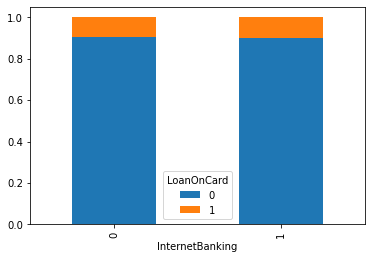

In [64]:
Internetbanking=pd.crosstab(Data["InternetBanking"],Data["LoanOnCard"])
Internetbanking.div(Internetbanking.sum(1).astype(float),axis=0).plot.bar(stacked=True)

- people who have availed Internet Banking and those who dont have Internet Banking facility have equal probability of having Loan on card. Thus this feature has no effect on loan on card

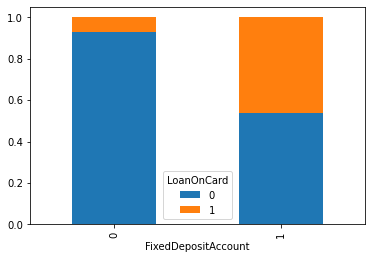

In [65]:
FixedDepositAccount=pd.crosstab(Data["FixedDepositAccount"],Data["LoanOnCard"])
FixedDepositAccount.div(FixedDepositAccount.sum(1).astype(float),axis=0).plot.bar(stacked=True)

- People with Fixed deposite with bank have more loans on card 

### Analysing numerical Features

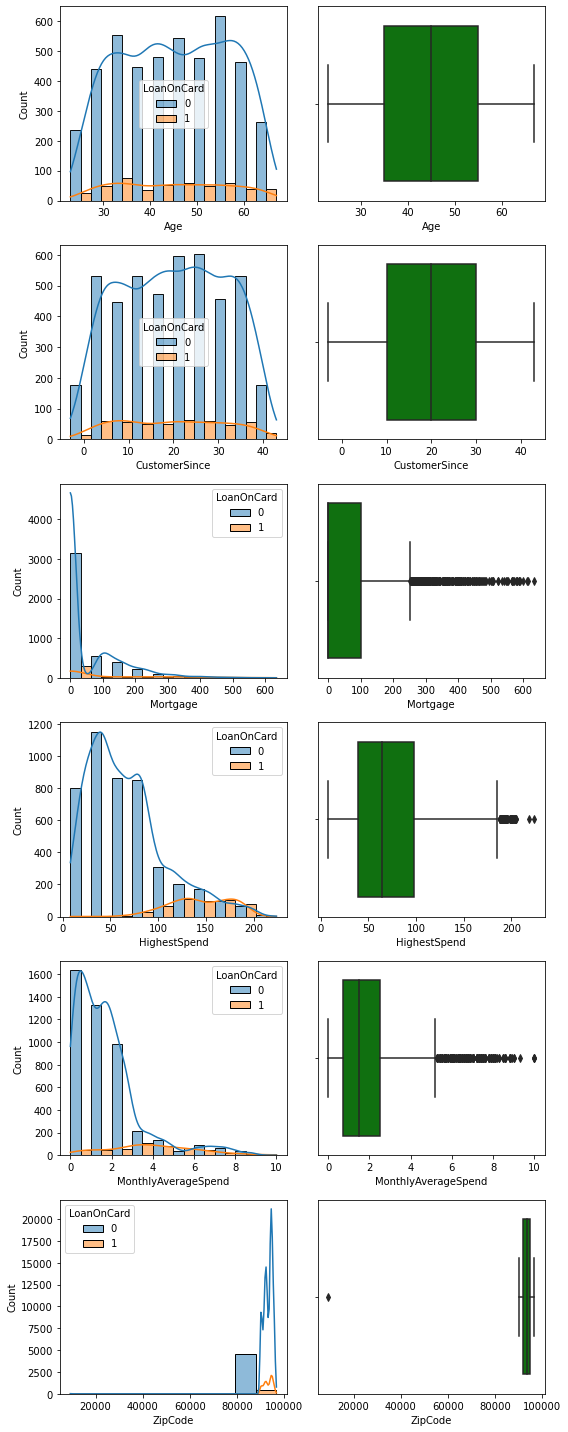

In [66]:
fig,ax= plt.subplots(6,2,figsize=(8,20))
sns.histplot(x=Data["Age"],data=Data,bins=10,ax=ax[0][0],kde=True,hue="LoanOnCard",multiple="dodge");
sns.boxplot(x=Data["Age"],data=Data,ax=ax[0][1],color="green")

sns.histplot(x=Data["CustomerSince"],data=Data,bins=10,ax=ax[1][0],kde=True,hue="LoanOnCard",multiple="dodge")
sns.boxplot(x=Data["CustomerSince"],data=Data,ax=ax[1][1],color="green")

sns.histplot(x=Data["Mortgage"],data=Data,bins=10,ax=ax[2][0],kde=True,hue="LoanOnCard",multiple="dodge")
sns.boxplot(x=Data["Mortgage"],data=Data,ax=ax[2][1],color="green")

sns.histplot(x=Data["HighestSpend"],data=Data,bins=10,ax=ax[3][0],kde=True,hue="LoanOnCard",multiple="dodge")
sns.boxplot(x=Data["HighestSpend"],data=Data,ax=ax[3][1],color="green")

sns.histplot(x=Data["MonthlyAverageSpend"],data=Data,bins=10,ax=ax[4][0],kde=True,hue="LoanOnCard",multiple="dodge")
sns.boxplot(x=Data["MonthlyAverageSpend"],data=Data,ax=ax[4][1],color="green")

sns.histplot(x=Data["ZipCode"],data=Data,bins=5,ax=ax[5][0],kde=True,hue="LoanOnCard",multiple="dodge")
sns.boxplot(x=Data["ZipCode"],data=Data,ax=ax[5][1],color="green")

plt.tight_layout()

- age and customer since are normally and have no outliers too
- most of the customers are from age between 35 to 55
- Highest spend of 75% of customers is below 98 units
- Monthly Average Spend of 75% of customers is below 2.5 units
- zipcode is highly skewed and have a outlier too
- Mortgage , Highest spend and Monthly Average spend are positively skewed and have outliers too
  - the potential reason for this skew and outliers can be the Data imbalance

### analysisng effect of numerical features on target 

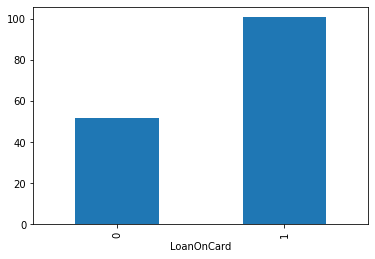

In [67]:
Data.groupby("LoanOnCard")["Mortgage"].mean().plot.bar()

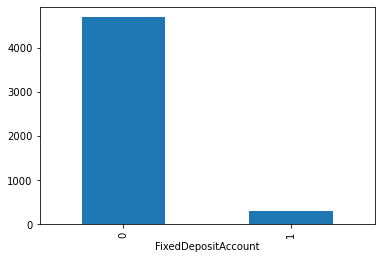

In [43]:
Data.groupby("FixedDepositAccount")["LoanOnCard"].count().plot.bar()



- On an average Customers with more Mortagages have more loans on card. Mortgage seems a good predictor of Loan on card

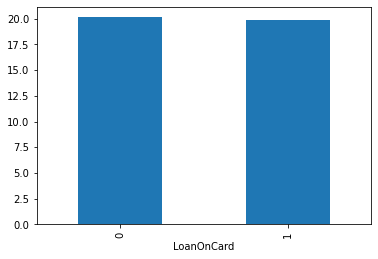

In [68]:
Data.groupby("LoanOnCard")["CustomerSince"].mean().plot.bar()

- customer Since have no effect on LoanOnCard.There is no significant relationship between Loan on card and customaer since

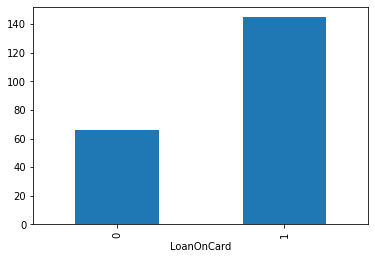

In [69]:
Data.groupby("LoanOnCard")["HighestSpend"].mean().plot.bar()

- On an average People Spending High take more loans on cards.Highest Spend seems a good predictor of Loan on card

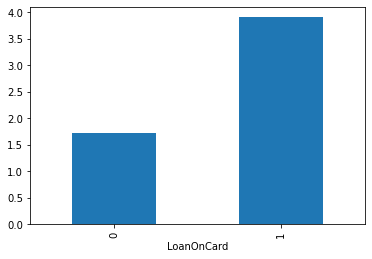

In [70]:
Data.groupby("LoanOnCard")["MonthlyAverageSpend"].mean().plot.bar()

- On an average people with high monthly average spend take more loans on card.Monthly Average Spend seems a good predictor of Loan on card

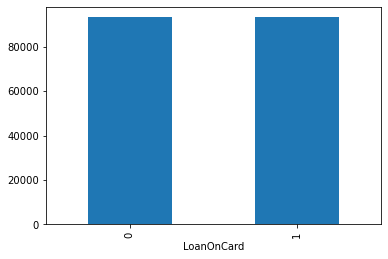

In [71]:
Data.groupby("LoanOnCard")["ZipCode"].mean().plot.bar()

- ZipCode have no effect on LoanOnCard.There is no significant relationship between Loan on card and Zipcode

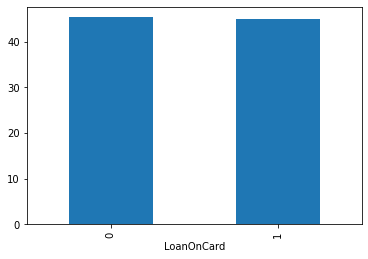

In [72]:
Data.groupby("LoanOnCard")["Age"].mean().plot.bar()

- Though as per Data age shows no effect on loanoncard but in reality it has effect on probability of getting loans

### Analysing relationship of numerical Features with each other 

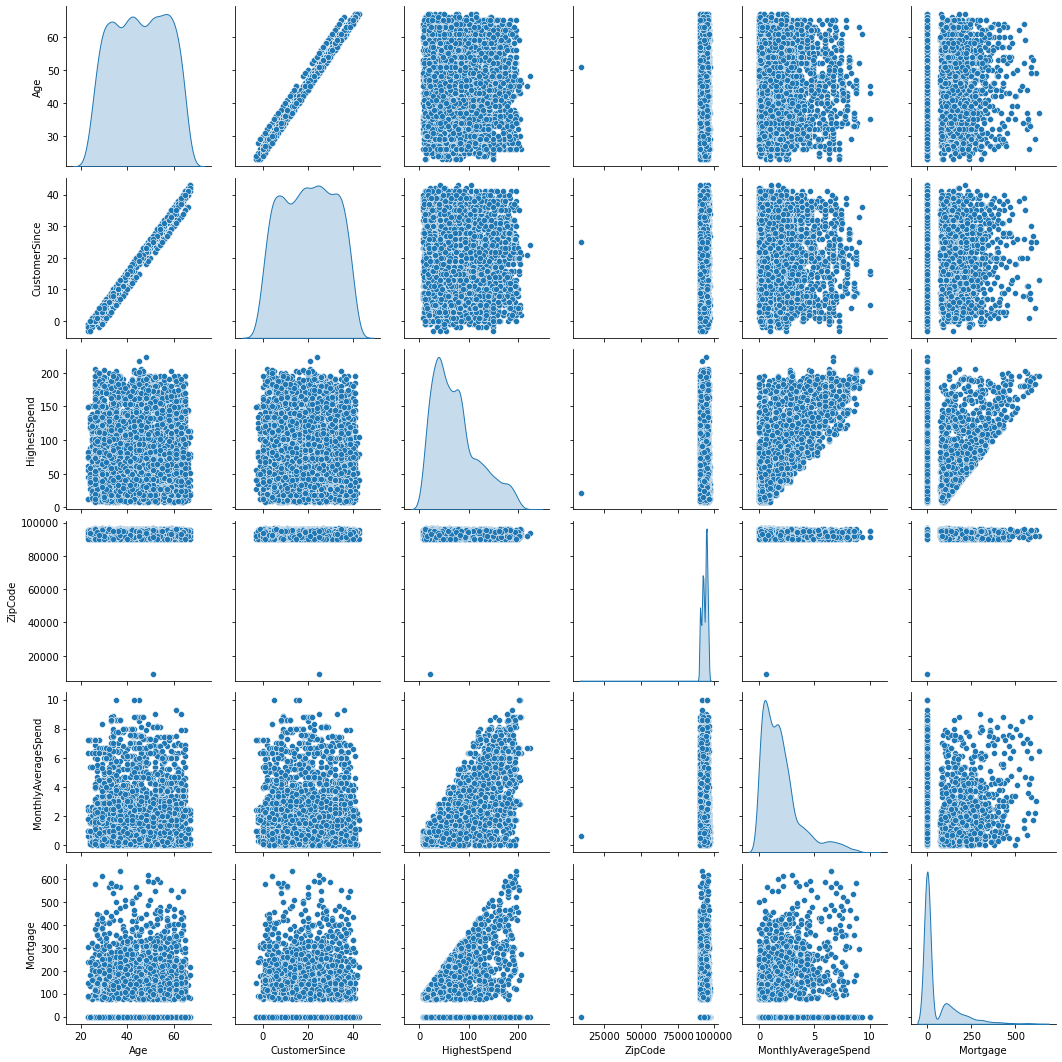

In [73]:
sns.pairplot(data=Data[num_col],diag_kind="kde");

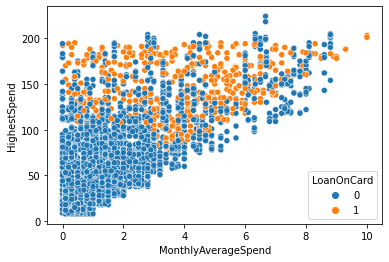

In [74]:
sns.scatterplot(x="MonthlyAverageSpend",y="HighestSpend",data=Data,hue="LoanOnCard")

- people with higher Monthly Average Spend and Highest Spend are having more loans on card

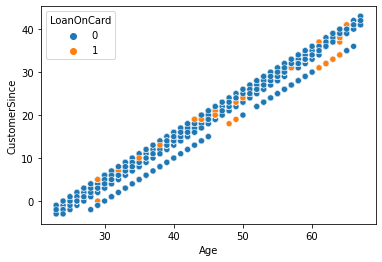

In [75]:
sns.scatterplot(y="CustomerSince",x="Age",data=Data,hue="LoanOnCard")

- customer since and age are strongly correlated with each other but they have no relation with Loan on card
### Correlation

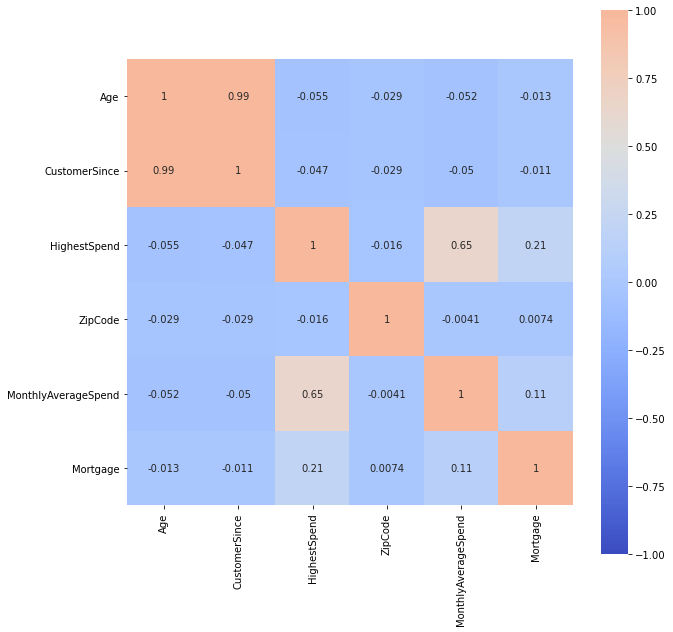

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True,vmin=-1,vmax=1,center=0.5,square=True,cmap="coolwarm")

- Age and CustomerSince are highly correlated
- Highestspend and MonthlyAverageSpend is also correlated 
- zipcode has absolutely no correlation with any other feature
- Mortgage has absolutely no correlation with any other feature


## Hypothesis Testing
### Testing the independence of categorical Features with Target Variable (Chi Square Test for independence)
     - Null Hypothesis:  There is no relationship between Feature and target variable 
     - Alternate Hypothesis: There is a significant relationship between Feature and target variable 

In [77]:
crosstab=[Creditcard,Internetbanking,Security,Level,Hiddenscore,FixedDepositAccount]
for tab, col in [(crosstab[0],"CreditCard"),(crosstab[1],"InternetBanking"),(crosstab[2],"Security"),(crosstab[3],"Level"),(crosstab[4],"HiddenScore"),(crosstab[5],"FixedDepositAccount")]:
    stats,pval,_,_=chi2_contingency(tab)
    if pval<0.05:
        print("There is a significant relationship between {} and LoanOnCard".format(col))
    else:
        print("There is no relationship between {} and LoanOnCard".format(col))

There is no relationship between CreditCard and LoanOnCard
There is no relationship between InternetBanking and LoanOnCard
There is no relationship between Security and LoanOnCard
There is a significant relationship between Level and LoanOnCard
There is a significant relationship between HiddenScore and LoanOnCard
There is a significant relationship between FixedDepositAccount and LoanOnCard


### Testing the independence of Numerical Columns Features with Target Variable(Independent t-test)
 - Null Hypothesis: There is no significant difference in feature Variable for  different categories of Target variable
 - Alternate Hypothesis:There is significant difference in feature for  different categories of Target variable

In [78]:
for col in num_col:
    Class0=Data[Data["LoanOnCard"]==0][col]
    Class1=Data[Data["LoanOnCard"]==1][col]
    
    stats,p_value =ttest_ind(Class0,Class1,equal_var=False)
    if p_value<0.05:
        print("There is significant difference in {} for different categories of Loan on card".format(col))
    else:
        print("There is no significant difference in {} for different categories of Loan on card".format(col))

There is no significant difference in Age for different categories of Loan on card
There is no significant difference in CustomerSince for different categories of Loan on card
There is significant difference in HighestSpend for different categories of Loan on card
There is no significant difference in ZipCode for different categories of Loan on card
There is significant difference in MonthlyAverageSpend for different categories of Loan on card
There is significant difference in Mortgage for different categories of Loan on card


### Dropping the columns which have no association and correlation with target column

In [79]:
Data2=Data.drop(["Age","CustomerSince","ZipCode","Security","InternetBanking","CreditCard"],axis=1)
Data2.columns

Index(['HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'FixedDepositAccount', 'LoanOnCard'],
      dtype='object')

## Data pre-processing: 
- Segregate predictors vs target attributes 
- Check for target balancing and fix it if found imbalanced.
- Perform train-test split

In [80]:
scalar=StandardScaler()
#segregating predictors vs target attributes 
X= Data2.drop("LoanOnCard",axis=1)
y=Data2["LoanOnCard"]

In [81]:
X.loc[:,["HighestSpend","MonthlyAverageSpend","Mortgage"]]=scalar.fit_transform(X.loc[:,["HighestSpend","MonthlyAverageSpend","Mortgage"]])

In [82]:
Data2["LoanOnCard"].value_counts(normalize=True)*100

0    90.4
1     9.6
Name: LoanOnCard, dtype: float64

- Here it is evident that Class 0 has maximum contribution in the Data set thus making it an imbalanced Data

For Logistic Regression if the training set is imbalanced,there may not be sufficient patterns belonging to the minority class to adequately represent its distribution.Many machine learning algorithms are designed to maximize overall accuracy by default.So if our model has a good overall accuracy,it will predict  only class 0, which means it will completely ignoring the minority class in favor of the majority class.

In [83]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

### Baseline Model with imbalanced Data

In [84]:
logistic=LogisticRegression(solver="liblinear",class_weight=None)
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
# performance
print(f'Accuracy on training Data: {logistic.score(X_train,y_train)}')
print(f'Accuracy on test Data: {logistic.score(X_test,y_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

Accuracy on training Data: 0.9468571428571428
Accuracy on test Data: 0.9473333333333334
Area Under Curve: 0.7647554135887411


=====Classification Report======
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.54      0.67       149

    accuracy                           0.95      1500
   macro avg       0.92      0.76      0.82      1500
weighted avg       0.94      0.95      0.94      1500




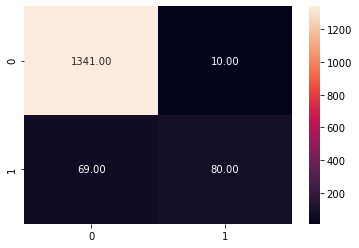

In [85]:

print("=====Classification Report======")
print(classification_report(y_test,y_pred))
print("")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.2f')

Though overall accuracy of of model is 94.6% but recall of our minority class is suffering. Model is able to predict 80 correct out of 149 values. For majority class, model got only 10 prediction wrong.Model is not doing a good job in predicting minority class. 

### Weighted Logistic Regression(Strategy for handling imbalanced Data)

- for unbalanced target variable, the best practice for weights is to use the inverse of the target distribution.In our Dataset, label distribution is 10:90 so we can specify weights as inverse of label distribution. For majority class,we  will use weight of 10 and for minority class, will use weight of 90. 
- So the penalty of wrong prediction of minority class would be 90 times more severe than wrong prediction of majority class.

In [86]:
# define class weights
w = {0:10, 1:90}
# define model
logistic1 = LogisticRegression(solver="liblinear", class_weight=w)
# fit it
logistic1.fit(X_train,y_train)
# test
y_pred = logistic1.predict(X_test)
# performance
print(f'Accuracy on training Data: {logistic1.score(X_train,y_train)}')
print(f'Accuracy on test Data: {logistic1.score(X_test,y_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')


Accuracy on training Data: 0.9008571428571429
Accuracy on test Data: 0.902
Area Under Curve: 0.8888692939358862


=====Classification Report======
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1351
           1       0.50      0.87      0.64       149

    accuracy                           0.90      1500
   macro avg       0.74      0.89      0.79      1500
weighted avg       0.94      0.90      0.91      1500




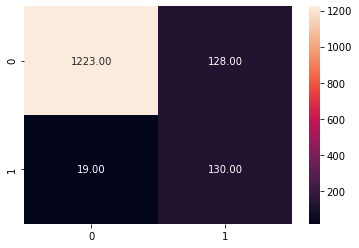

In [87]:
print("=====Classification Report======")
print(classification_report(y_test,y_pred))
print("")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.2f')

- in weighted logistic regression though recall of minority class has increased but its precision has suffered. Thus this strategy is effective when we want to improve the recall of minority class without effecting much the recall of majority class
- For minority class, model got only 19 prediction wrong.Earlier it was 69 wrong predictions
- we can see the area under the curve has also increased from 76.4 to 88.8

### Using SMOTENCfor Data Balancing

In [90]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[1,3,5], random_state=42)
X_train_sm, y_train_sm = smote_nc.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_train_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3500, 6)
Shape of X after SMOTE: (6338, 6)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: LoanOnCard, dtype: float64

### building and training model after SMOTE

In [89]:
logistic_sm=LogisticRegression(solver="liblinear",class_weight=None)
logistic_sm.fit(X_train_sm, y_train_sm)
y_pred_sm=logistic_sm.predict(X_test)
# performance
print(f'Accuracy on training Data: {logistic.score(X_train_sm,y_train_sm)}')
print(f'Accuracy on test Data: {logistic.score(X_test,y_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_sm)}')

Accuracy on training Data: 0.7873146102871569
Accuracy on test Data: 0.9473333333333334
Area Under Curve: 0.8911147099588175


- it is evident that our test accuracy has increased  from 90.2(using weighted logistic regression) to 94.7
- weighted logistic model train and test accuracies were same
- but in smote the test accuracy is greater than training accuracy
- ROC has also slightly increased
- overall recal of both the labels has also increased


=====Classification Report======
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1351
           1       0.50      0.88      0.64       149

    accuracy                           0.90      1500
   macro avg       0.74      0.89      0.79      1500
weighted avg       0.94      0.90      0.91      1500




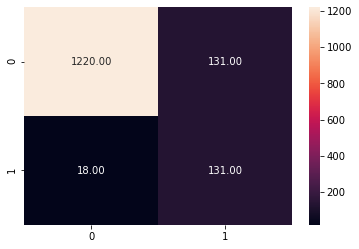

In [91]:
print("=====Classification Report======")
print(classification_report(y_test,y_pred_sm))
print("")
sns.heatmap(confusion_matrix(y_test, y_pred_sm),annot=True,fmt='.2f')

### thus we can that in weighted logistic model and in the Model after using SMOTE we dont get much difference

## tuning Hyperparameters for logistic regression

In [92]:
logreg = LogisticRegression(class_weight=w)#w will take care of balancing the Data
hyperparam_grid = {"class_weight": [w]
                   ,"penalty": ["l2"]
                   ,"C": [100, 10, 1.0, 0.1, 0.01]
                    }

best_model = GridSearchCV(logreg,hyperparam_grid,scoring='roc_auc',cv=10)
best_model.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(best_model.best_score_, best_model.best_params_))

Best roc_auc: 0.9574, with best C: {'C': 100, 'class_weight': {0: 10, 1: 90}, 'penalty': 'l2'}


- after tuning hyperparameters best ROC achieved is 95.7


## Naive Bayes Classifier

In [93]:
X_NB=X.copy()
X_NB.columns

Index(['HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'FixedDepositAccount'],
      dtype='object')

- Our Dataset has both  categorical and numerical columns. So no single Naive Bayes classifier can classify the Data set with mixed features.
- Strategy used to handle this drawback is to bin the numerical features in different bins using the percentiles as bin boundaries and categorise numerical features as "low","Medium","High" for example

### binning the numerical features in different bins using the percentiles 

In [94]:
bin1=[-1.43,-.76,-.22,.53,3.3]
values1=["low","Average","high","Very High"]
X_NB["HighestSpend_bin"]=pd.cut(X_NB["HighestSpend"],bin1,labels=values1)

In [95]:
bin1=[-1.2,-.71,-.26,.33,4.7]
values1=["low","Average","high","Very High"]
X_NB["MonthlyAverageSpend_bin"]=pd.cut(X_NB["MonthlyAverageSpend"],bin1,labels=values1)

In [96]:
bin1=[-.6,-.5,.44,5.7]
values1=["No","Moderate","high"]
X_NB["Mortgage_bin"]=pd.cut(X_NB["Mortgage"],bin1,labels=values1)

### Checking the proportion of values in every feature after binning

In [97]:
X_NB["HighestSpend_bin"].value_counts(normalize=True)

high         0.2528
Average      0.2518
Very High    0.2492
low          0.2462
Name: HighestSpend_bin, dtype: float64

In [98]:
X_NB["MonthlyAverageSpend_bin"].value_counts(normalize=True)

high         0.2830
Very High    0.2496
low          0.2424
Average      0.2250
Name: MonthlyAverageSpend_bin, dtype: float64

In [99]:
X_NB["Mortgage_bin"].value_counts(normalize=True)

No          0.6924
high        0.2484
Moderate    0.0592
Name: Mortgage_bin, dtype: float64

- Data seems fairly binned
### Label encoding the binned Features

In [100]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
X_NB.loc[:,["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]]=X_NB.loc[:,["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]].apply(LB.fit_transform)
#converting label encoded Features from int to category
X_NB[["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]]=X_NB[["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]].astype("category")

In [101]:
# droping continous features after converting them to caterogy
X_NB.drop(["HighestSpend","MonthlyAverageSpend","Mortgage"],axis=1,inplace=True)

In [102]:
#segregating feature and target variable
y_NB=Data["LoanOnCard"]

In [103]:
# traintestsplit
X_NB_train,X_NB_test,y_NB_train,y_NB_test=train_test_split(X_NB,y_NB,test_size=0.30,random_state=1)

In [104]:
y_NB.value_counts(normalize=True)

0    0.904
1    0.096
Name: LoanOnCard, dtype: float64

- Here it is evident that Class 0 has maximum contribution in the Data set thus making it an imbalanced Data
 
Class imbalanced in Data sets, has a potential impact in the training procedure of a classifier by learning a model that will be biased in favor of the majority class.

- Thus Balancing is required

### Using Stratified KFold CrossValidation for balancing the Data
 - Using Categorical Naive Bayes and GaussianNB both to compare which one performs better on Categorical Data
    

In [105]:
X_NB.columns

Index(['HiddenScore', 'Level', 'FixedDepositAccount', 'HighestSpend_bin',
       'MonthlyAverageSpend_bin', 'Mortgage_bin'],
      dtype='object')

In [106]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cnb = CategoricalNB()
gnb = GaussianNB()



In [107]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
countcnb=[]
recall=[]
f1=[]
trainscore=[]
testscore=[]
for train_ix, test_ix in kfold.split(X_NB, y_NB):
        # select rows
        X_train_res, X_test_res = X_NB.iloc[train_ix], X_NB.iloc[test_ix]
        y_train_res, y_test_res = y_NB.iloc[train_ix], y_NB.iloc[test_ix]
        cnb.fit(X_train_res, y_train_res)#categorical Naive Bayes
        #gnb.fit(X_train_res, y_train_res)#Gaussian Naive Bayes 
        #Performance metrics - Testing score
        y_pred_cnb = cnb.predict(X_test_res)
        # how did our model perform?
        count_misclassified = (y_test_res != y_pred_cnb).sum()
        countcnb.append(count_misclassified)
        score1=cnb.score(X_train_res,y_train_res)   
        score2=cnb.score(X_test_res,y_test_res) 
        trainscore.append(score1)
        testscore.append(score2)           
                        
print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(countcnb))
print('Best Training Accuracy: {:.2f}'.format(max(trainscore)))
print('Best Test Accuracy: {:.2f}'.format(max(testscore)) )                      
                        

CategoricalNB
Misclassified samples: [21, 15, 18, 22, 23, 21, 23, 18, 16, 23]
Best Training Accuracy: 0.96
Best Test Accuracy: 0.97


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       452
           1       0.86      0.62      0.72        48

    accuracy                           0.95       500
   macro avg       0.91      0.81      0.85       500
weighted avg       0.95      0.95      0.95       500



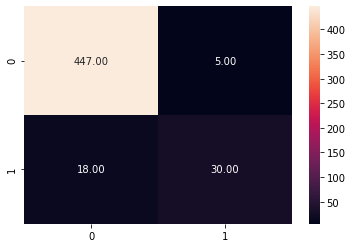

In [108]:
print("Classification Report")
print("=" * 30)
y_pred_cnb=cnb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_cnb))

sns.heatmap(confusion_matrix(y_test_res,y_pred_cnb),annot=True,fmt='.2f')

In [109]:
countgnb=[]
recall=[]
f1=[]
trainscore=[]
testscore=[]
for train_ix, test_ix in kfold.split(X_NB, y_NB):
        # select rows
        X_train_res, X_test_res = X_NB.iloc[train_ix], X_NB.iloc[test_ix]
        y_train_res, y_test_res = y_NB.iloc[train_ix], y_NB.iloc[test_ix]
        gnb.fit(X_train_res, y_train_res)#Gaussian Naive Bayes 
        #Performance metrics - Testing score
        y_pred_gnb = gnb.predict(X_test_res)
        # how did our model perform?
        count_misclassified = (y_test_res != y_pred_gnb).sum()
        countgnb.append(count_misclassified)
        score1=cnb.score(X_train_res,y_train_res)   
        score2=cnb.score(X_test_res,y_test_res) 
        trainscore.append(score1)
        testscore.append(score2)           
                        
print("GaussianNB")
print("=" * 30)
print('Misclassified samples: {}'.format(countgnb))
print('Best Training Accuracy: {:.2f}'.format(max(trainscore)))
print('Best Test Accuracy: {:.2f}'.format(max(testscore)) )     

GaussianNB
Misclassified samples: [56, 46, 41, 49, 53, 35, 48, 43, 45, 39]
Best Training Accuracy: 0.96
Best Test Accuracy: 0.97


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       452
           1       0.76      0.27      0.40        48

    accuracy                           0.92       500
   macro avg       0.85      0.63      0.68       500
weighted avg       0.91      0.92      0.90       500



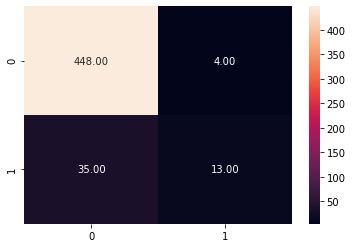

In [110]:
print("Classification Report")
print("=" * 30)
y_pred_gnb=gnb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_gnb))

sns.heatmap(confusion_matrix(y_test_res,y_pred_gnb),annot=True,fmt='.2f')

In [111]:
details = { 'GNB_Miscalssification' : [int(np.mean(countgnb))],'CNB_Miscalssification' : [int(np.mean(countcnb))]} 
mis=pd.DataFrame(details)
mis

,GNB_Miscalssification,CNB_Miscalssification
0,45,20


- Though train and test accuracies of Both the models is same but total miscalssifications of Gaussian Naive Bayes is more as compared to Categorical Naive Bayes
- thus we will go by Categorical Naive Bayes


- The motive of building this model is to predict a customer for focussed marketing
- we want to predict the customers who dont have loan ie customers with label 0
  - thus we will report precision of label 0 because we dont want to waste our resources in targeting the customers who cant be converted 
  - precision will tell us out of the predicted values how many were predicted correctly
- we are intrested in recall of label 0 as well because we dont want to loose the customers as well
- thus a blend of recall and score will be f1_score which we will use to evaluate the model accuracy
- Categorical Naive Bayes has precision score of 96,recall score of 99 and f1_score of 97  with overall accuracy of 95% for class 0(Class of Intrest)
- Even after using Strafied KFold of balancing the recall score of minority class is still suffering
- Further Investigation Might be needed

- Out of all the three models Categorical is more accurate in predicting the potential customers with 97% of f1_score


### Feature of Importance in Logistic Regression

Text(0.5, 0, 'Importance')

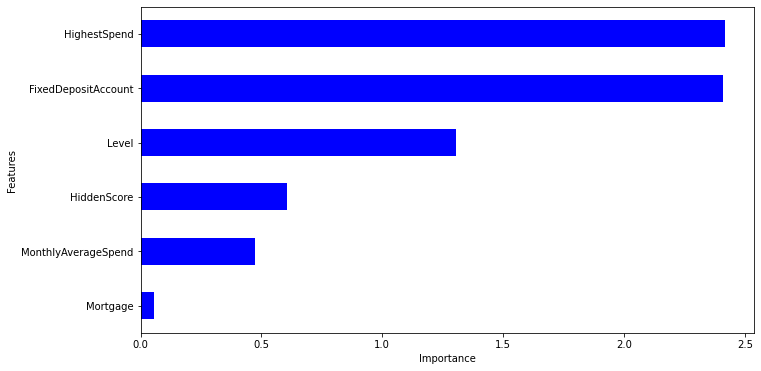

In [112]:
coeff = list(logistic1.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features["importance"].plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [113]:
features

,importance,positive
Features,,
Mortgage,0.055942,True
MonthlyAverageSpend,0.471716,True
HiddenScore,0.605110,True
Level,1.305569,True
FixedDepositAccount,2.408347,True
HighestSpend,2.417615,True


## Conclusion
- Mortgage has negligible effect on Predicting Target Variable
- HighestSpend is the least significant predictor after mortagage
- FixedDepositAccount is the most significant predector of target variable
- model has a good  precision for label 0 thus predicts most relevant Data with minimum misclassification
- model gives a fair recall score as well for label 0 which will prevent us from loosing the customers as well
- logistic Regression has overall good accuracy score and AUC as well
  Best roc_auc: 0.9574, with best C:0.1
- Data have few missing values in target variable but Data is imbalanced 
- for Balancing the Data Stratified KFold is used for Naive Bayes and SMOTENC is used to Logistic regression
- appropriate oversampling is done to balance the Data but oversampling has a drawback of creating overlapping Data
- this overlapping may give some problem in classifier performance as samples from different classes may share similar characteristics since the boundaries of each class may not be clearly defined.
- SMOTENC is carefully used on training Data only to prevent and Data leaking